In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [3]:
filename = "L_bracket_stress.h5"
def load_all_samples(filename):
    all_data = []
    coord_stress_list = []
    with h5py.File(filename, 'r') as hf:
        # Sort keys to ensure numerical order (sample_0, sample_1, ...)
        # splitting by '_' and taking the last part ensures 'sample_10' comes after 'sample_2'
        keys = sorted(hf.keys(), key=lambda x: int(x.split('_')[1]))
        
        print(f"Found {len(keys)} samples. Loading...")
        
        for key in keys:
            group = hf[key]
            
            # Create a dictionary for this sample
            sample = {
                'points': group['points'][:],  # (N, 2)
                'stress': group['stress'][:],  # (N, 1)
                'corner': group['corner'][:]   # (2,)
            }
            coord_stress = np.hstack((sample['points'], sample['stress']))  # (N, 3)
            coord_stress_list.append(coord_stress)
            all_data.append(sample)
        
    return coord_stress_list, all_data

# Load everything
coord_stress_list, all_data = load_all_samples("L_bracket_stress.h5")

# Verification
print(f"\nLoaded {len(all_data)} samples successfully.")
print(f"Sample 0 node count: {all_data[0]['points'].shape[0]}")
print(f"Sample 1 node count: {all_data[1]['points'].shape[0]} (Note: N varies per mesh)")

Found 5000 samples. Loading...

Loaded 5000 samples successfully.
Sample 0 node count: 349
Sample 1 node count: 394 (Note: N varies per mesh)


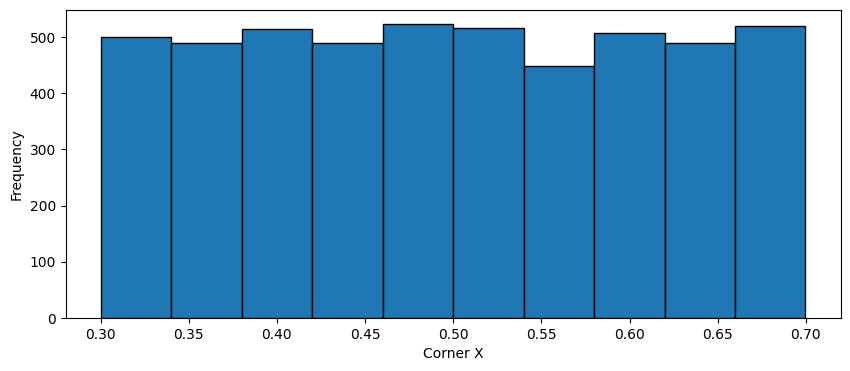

In [4]:
#histogram of corner locations
corners = np.array([sample['corner'] for sample in all_data])  # (num_samples, 2)
plt.figure(figsize=(10,4))
plt.hist(corners[:, 0], bins=10, edgecolor='black')
plt.xlabel('Corner X')
plt.ylabel('Frequency')
plt.show()

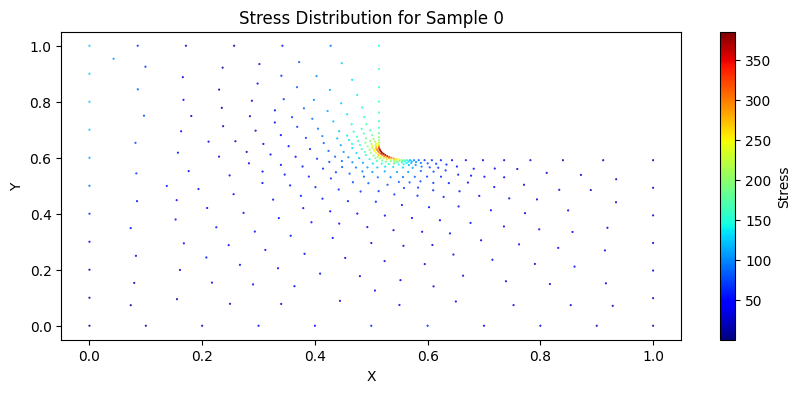

In [5]:
n = 5
plt.figure(figsize=(10,4))
plt.scatter(coord_stress_list[n][:, 0], coord_stress_list[n][:, 1], c=coord_stress_list[n][:, 2], cmap='jet', marker='.', s=1)
plt.colorbar(label='Stress')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Stress Distribution for Sample 0')
plt.show()

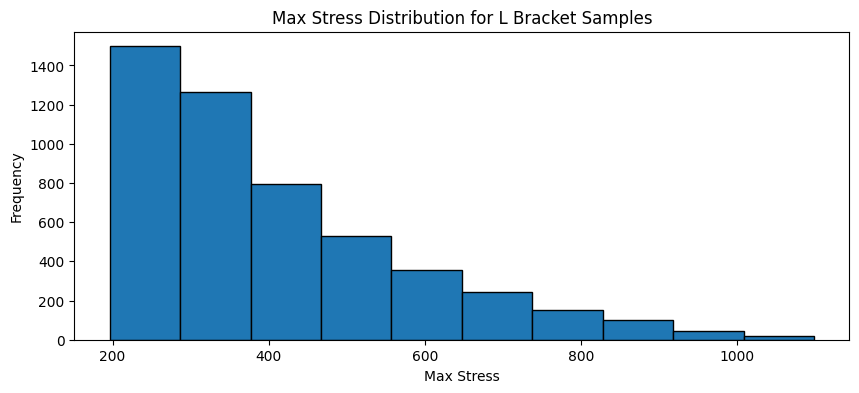

In [7]:
#max stress for each sample
max_stresses = [np.max(sample['stress']) for sample in all_data]
plt.figure(figsize=(10,4))
plt.title('Max Stress Distribution for L Bracket Samples')
plt.hist(max_stresses, bins=10, edgecolor='black')
plt.xlabel('Max Stress')
plt.ylabel('Frequency')
plt.show()

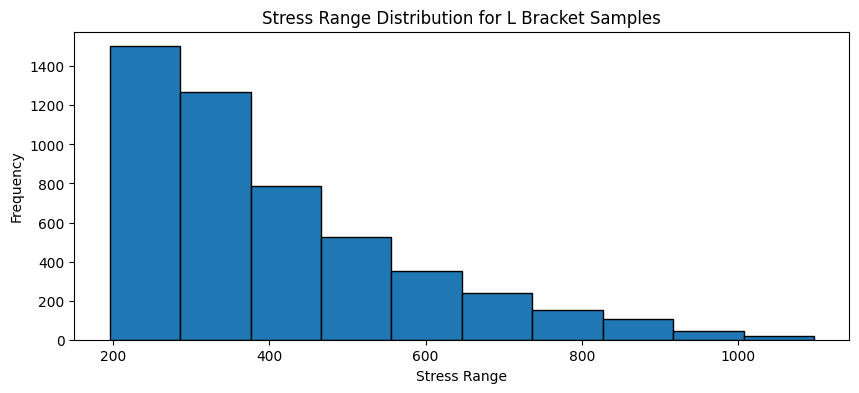

In [8]:
#stress range for each sample
stress_ranges = [np.ptp(sample['stress']) for sample in all_data]  # ptp = max - min
plt.figure(figsize=(10,4))
plt.title('Stress Range Distribution for L Bracket Samples')
plt.hist(stress_ranges, bins=10, edgecolor='black')
plt.xlabel('Stress Range')  
plt.ylabel('Frequency')
plt.show()